In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 

from tensorflow.keras.layers import Dense, Flatten, Concatenate

from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
import os

In [3]:
# установка параметров нейросети
batch_size = 30
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 15


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
#трансформация лейблов в one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170508288/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [4]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

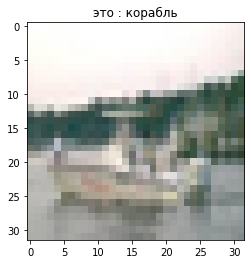

In [5]:
N = 240

plt.imshow(x_train[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_train[N,:])])
plt.show()

In [6]:
# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 32,32,3)
x_test = x_test.reshape(x_test.shape[0], 32,32,3)

# AlexNet

In [7]:
from tensorflow.keras.models import Model 
# инициализация  модели
input1= keras.layers.Input(shape=(32,32,3))

# первый сверточный слой
x1 = keras.layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  padding="same")(input1)
print(f'размер x1 : {x1.shape}')

# второй пуллинговый слой
x2 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(x1)
print(f'размер x2 : {x2.shape}')

# третий сверточный слой
x3 = keras.layers.Conv2D(120, kernel_size=(2, 2), strides=(1, 1), activation='tanh', padding='same')(x2)
print(f'размер x3: {x3.shape}')

# четвертый пуллинговый слой
x4 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x3)
print(f'размер x4: {x4.shape}')

# пятый  слой
x5 = keras.layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='same')(x4)
print(f'размер x5: {x5.shape}')

# шестой  слой
x6 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x5)
print(f'размер x6: {x6.shape}')

# седьмой  слой
x7 = keras.layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x6)
print(f'размер x7: {x7.shape}')

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x8 = keras.layers.Flatten()(x7)
print(f'размер x8: {x8.shape}')

# полносвязный слой
x9 = keras.layers.Dense(256, activation='tanh')(x8)

# выходной слой с функцией активации softmax
out_x = keras.layers.Dense(10, activation='softmax')(x9)


# Соберем полную модель сети от входа к выходу 
model1 = Model(inputs = input1, outputs = out_x) 
# сделаем несколько промежуточных выходов (через них посмотрим , что происходит в сети) 
model3 = Model(inputs = input1, outputs = x3)
model5 = Model(inputs = input1, outputs = x5)
# компилияция модели
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer= 'Adam', metrics=["accuracy"])

# Обучаем модель
hist = model1.fit(x=x_train,y=y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model1.evaluate(x_test, y_test)
print("Test loss {:.2f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

размер x1 : (None, 32, 32, 120)
размер x2 : (None, 32, 32, 120)
размер x3: (None, 32, 32, 120)
размер x4: (None, 16, 16, 120)
размер x5: (None, 16, 16, 120)
размер x6: (None, 8, 8, 120)
размер x7: (None, 4, 4, 120)
размер x8: (None, 1920)
Epoch 1/100
391/391 [==============================] - 50s 96ms/step - loss: 2.3578 - accuracy: 0.1016 - val_loss: 2.3109 - val_accuracy: 0.1000
Epoch 2/100
391/391 [==============================] - 37s 94ms/step - loss: 2.3154 - accuracy: 0.0981 - val_loss: 2.3192 - val_accuracy: 0.1000
Epoch 3/100
391/391 [==============================] - 37s 96ms/step - loss: 2.3164 - accuracy: 0.0995 - val_loss: 2.3183 - val_accuracy: 0.1000
Epoch 4/100
391/391 [==============================] - 38s 96ms/step - loss: 2.3183 - accuracy: 0.0996 - val_loss: 2.3154 - val_accuracy: 0.1000
Epoch 5/100
391/391 [==============================] - 38s 96ms/step - loss: 2.3158 - accuracy: 0.0979 - val_loss: 2.3128 - val_accuracy: 0.1000
Epoch 6/100
391/391 [===============

In [8]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 120)       9120      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 120)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 120)       57720     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 120)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 120)       360120

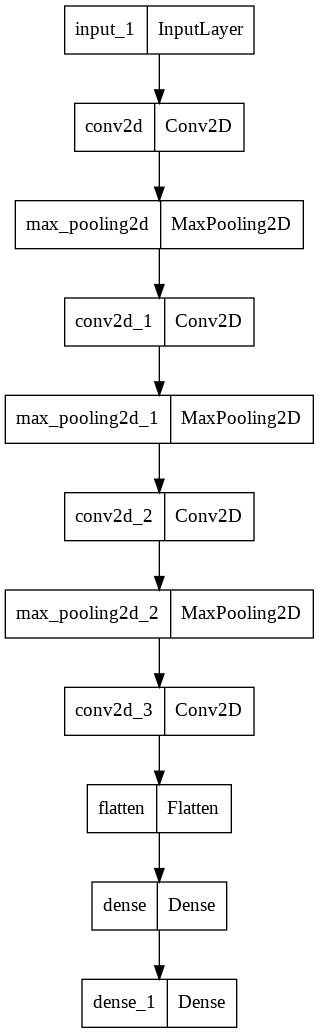

In [9]:
plot_model(model1,to_file='new_model-all.png')

In [10]:
y_pred = model1.predict(x_test)

In [11]:
# y_pred[10].max()
n = 110
print(classes[list(y_pred[n]).index(max(y_pred[n]))])

самолет


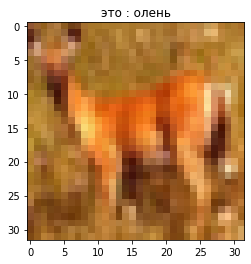

In [12]:
N = 80

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

# Вывод по AlexNet
после изменения п пулинговом слое с average на maxpooling и добавления еще двух слоев , кол-во итераций = 25, оптимайзер был изменен на Adam т.к. на прошлом уроке он показал лучший результат, точность на train выросла до 97% а на test до 65%  
уличение эпох до 100 и увелечение нейронов сильного прироста точности на тесте не дало, 69%, очень долго обучалась сеть, возможно если обучать еще дольше можно достигнуть нужного результата

In [ ]:
from tensorflow.python.ops.gen_dataset_ops import multi_device_iterator_get_next_from_shard_eager_fallback
first_input = Input(shape=(32,32,3 ))
x11= Conv2D(128,3,activation='relu',padding = 'same')(first_input)
#x11= Flatten()(x11)
first_dense = x11# Dense(10, )(x11)

#second_input = Input(shape=(28,28,1 ))
x22= Conv2D(128,5,activation='relu',padding = 'same')(first_input)
#x22= Flatten()(x22)
second_dense = x22 #Dense(10, )(x22)

x111= Conv2D(128,3,activation='tanh',padding = 'same')(first_input)
#x11= Flatten()(x11)
first_dense2 = x111# Dense(10, )(x11)

#second_input = Input(shape=(28,28,1 ))
x222= Conv2D(128,5,activation='tanh',padding = 'same')(first_input)
#x22= Flatten()(x22)
second_dense2 = x222 #Dense(10, )(x22)

x1111= Conv2D(128,3,activation='tanh',padding = 'same')(first_input)
#x11= Flatten()(x11)
first_dense3 = x1111# Dense(10, )(x11)

#second_input = Input(shape=(28,28,1 ))
x2222= Conv2D(128,5,activation='tanh',padding = 'same')(first_input)
#x22= Flatten()(x22)
second_dense3 = x2222 #Dense(10, )(x22)

merge_one = Concatenate(   )([first_dense, second_dense])
merge_two = Concatenate(   )([first_dense2, second_dense2])
merge_three = Concatenate(   )([first_dense3, second_dense3])

third_input = Input(shape=(32,32,3 ))
x33= Conv2D(10,1,activation='relu',padding = 'same')(first_input)
#x33= Flatten()(x33)
#x33 = Dense(10, )(x33)
merge_four = Concatenate( axis=-1)([merge_one, merge_two])
merge_five = Concatenate( axis=-1)([ merge_three, x33])
merge_six = Concatenate( axis=-1)([ merge_four, merge_five])
x8 = keras.layers.Flatten()(merge_six)
print(f'размер x8: {x8.shape}')

merge_seven=Dense(10, activation='softmax')(x8)


model_stek = Model(inputs=first_input, outputs=merge_seven)
#model_stek = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
# model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              # metrics=['accuracy'])
model_stek.compile(loss=keras.losses.categorical_crossentropy, optimizer= 'Adam', metrics=["accuracy"])


hist = model_stek.fit(x=x_train,y=y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model1.evaluate(x_test, y_test)
print("Test loss {:.2f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))


размер x8: (None, 796672)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/100
391/391 [==============================] - 71s 179ms/step - loss: 3.1488 - accuracy: 0.3846 - val_loss: 1.6353 - val_accuracy: 0.4634
Epoch 2/100
391/391 [==============================] - 71s 182ms/step - loss: 1.3620 - accuracy: 0.5345 - val_loss: 1.4150 - val_accuracy: 0.5253
Epoch 3/100
 45/391 [==>...........................] - ETA: 58s - loss: 1.1400 - accuracy: 0.6101

In [ ]:
plot_model(model_stek,'model_stek.png')

# Вывод по  Сетям со сложными конструкциями
после добавления большего кол-ва слоев и увеличения нейронов до 50 сеть стала дольше обучаться, результат на тесте доходит до 60% а потом с очень маленьким шагом то выше, то ниже, но потихоньку через одну или две итерации всё таки вырастает  
После увелечения эпох до 100 и большего кол-ва нейронов результат вырос до 69%
